Based on https://nbviewer.jupyter.org/url/pages.physics.cornell.edu/~sethna/StatMech/HintsAndMaterials/SandPHintsPython.ipynb with modifications

<H1>Stocks, volatility, and diversification</H1>

(Sethna, "Entropy, Order Parameters, and Complexity", ex. 2.11)

The Standard and Poor's 500 Index is a weighted average of the prices of five hundred large companies in the United States stock market. In this actiivty, you will analyze daily data on this index from the last 30 years to compare it to a random walk process.

Make sure you download SandPConstantDollars.dat from the Sethna exercises Web site, http://pages.physics.cornell.edu/~sethna/StatMech/HintsAndMaterials/SandPConstantDollars.dat. Each line represents the value of the index on a working weekday. The first column is time $t$ in days since mid-October 1982, and the second column is the Standard and Poor's index $SP(t)$ for that day, corrected for inflation.

Import packages

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Read in the file of Standard and Poor's average stock price (SP) in constant dollars (corrected for inflation), versus time t 

Convert from "list" to "array" form (arrays can be multiplied and added, etc.)

In [25]:
t, SP = np.array(np.loadtxt("SandPConstantDollars.dat").transpose())


#1. Plot SP versus t

You can plot a subset of the data using 'slicing': for a list or array v, v[m:n] gives back the elements in the range [m,n) -- starting at m and ending at n-1. 

**Q: For fun, examine the data around the month of your birth.**

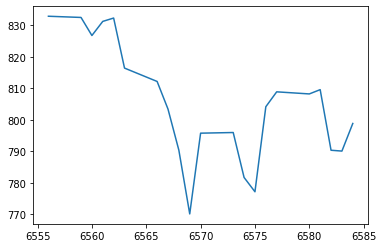

In [32]:
#my b-day = 07/10/2000 = roughly 18 years after it started = 18*365 = 6570
#subtract 15 and add 15 to get the month with the date in the middle

nt = []
nSP = []
for i,j in zip(t,SP):
    if i>6555 and i<6585:
        nt.append(i)
        nSP.append(j)

plt.plot(nt,nSP)

# 2. Calculate percentage changes 

To compare this data to a random walk, we need to descsribe the steps of the walk. What is the distribution of step sizes in stock prices? This depends on how we define a step; do we ask how much it has changed after a year, a month, a week, or a day? A technical question arises: do we measure time in days, or trading days. We shall follow the finance community, and consider only trading days. 

Furthermore, instead of considering the absolute change in price, we will consider a random walk where the value changes by a percentage of it's previous value. A simple example of this would be a random walk where with 50% probability, we either add 1% to the previous day's price or subtract 1% from the previous day's price (technically, this is a standard random walk in the *logarithm* of the price). This simple model would be a bad fit to the S&P index, but we can use the data we have to try to understand how a random walk model could be a better fit!

**Q: Define a function P(l) that calculates from the data the *percentage change* in the S&P index after a 'lag' of l trading days. For example, P(1) should give a list of the % change on each day from the previous trading day.**

### Note about optimal way to use scipy/numpy to do these calculations:
Use slicing to do all the comparisons in one array operation.
    For a list or array v, v[m:n] gives back the elements in the range [m,n) 
    -- starting at m and ending at n-1. Python also makes the useful convention
    that v[:,n] starts at the beginning of the list, v[m:] ends at the end, and 
    v[:,-p] 'drops' the last p elements.
     
Also use the scipy convention that arithmetic acts element-by-element on arrays. So for two
arrays w and v of the same length, 

    w*v = array([w[0]*v[0],w[1]*v[1], ...]), 
    
and similarly for w/v, w+v, and w-v. (The last two are the same as the math conventions for vectors.) Also, adding and subtracting scalars from arrays is done elementwise, so 

    v+5 = array([v[0]+5, v[1]+5, ...]).

Loops are very slow in interpreted languages like Python, so learning to do things with array operations like these is strongly recommended.

In [54]:
def P(lag, data):
   """
   Function which returns a list of percentage changes after a number
   "lag" of trading days. 
   P(1) gives the daily percentage changes, P(5) the weekly changes, P(20) the monthly, P(252) the yearly changes, etc.
   
   To find the ratio of values of an array v of length N after a shift of t, one could use
       v[t:N]/v[0:N-t]
   or
       v[t:]/v[:-t]
   """
   ratios = data[lag:]/data[:-lag]
   P = (ratios-1)*100
   return P

# 3. Distribution of percentage changes

**Q: We now want to study the distributions of daily, weekly, monthly, and yearly changes in price over our dataset.**

a) **Plot a normed histogram using 50 bins for daily, weekly, monthly, and yearly percentage changes.**

b) **Calculate the mean and standard deviation for each distribution.**

c) A simple random walk model for this data is that the daily steps are drawn independently and at random from the observed daily distribution. **Calculate the distribution you would expect for the *monthly* changes in this model of the data. Does the *observed* distribution of monthly changes agree with this model?**



mean for P=252:  7.7487031027622475
standard deviation for P=252:  15.723439026075111


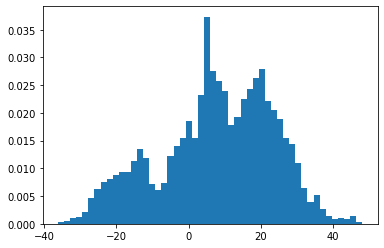

mean for P=20:  0.6132049633650821
standard deviation for P=20:  4.308953983847522


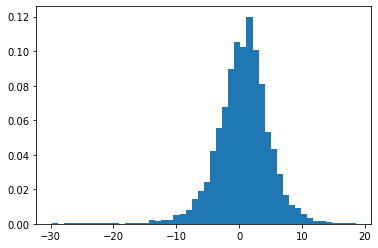

mean for P=5:  0.1560769616720594
standard deviation for P=5:  2.291749421353568


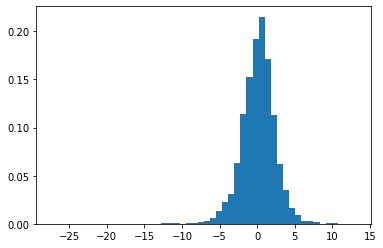

mean for P=1:  0.03114818458893953
standard deviation for P=1:  1.0606483448236002


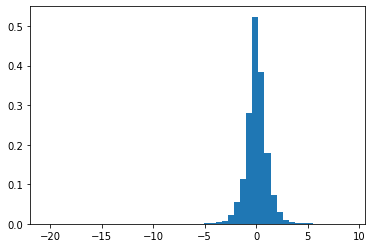

In [55]:
p = P(252, SP)
print('mean for P=252: ', np.mean(p))
print('standard deviation for P=252: ', np.std(p))
plt.hist(p, bins=50, density=True)
plt.show()

p = P(20, SP)
print('mean for P=20: ', np.mean(p))
print('standard deviation for P=20: ', np.std(p))
plt.hist(p, bins=50, density=True)
plt.show()

p = P(5, SP)
print('mean for P=5: ', np.mean(p))
print('standard deviation for P=5: ', np.std(p))
plt.hist(p, bins=50, density=True)
plt.show()

p = P(1, SP)
print('mean for P=1: ', np.mean(p))
print('standard deviation for P=1: ', np.std(p))
plt.hist(p, bins=50, density=True)
plt.show()

mean for P=20:  0.16154062818795598
standard deviation for P=20:  4.375821258473223


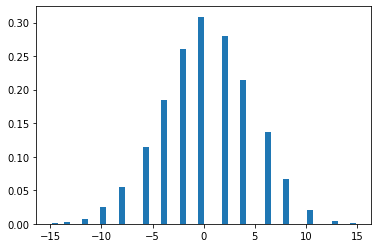

In [79]:
def random_walk(n, start):
    l = [start]
    for i in range(n):
        l.append(l[i]*np.random.choice([0.99,1.01],1)[0])
    return np.array(l)

p = P(20, random_walk(10000, 1))
print('mean for P=20: ', np.mean(p))
print('standard deviation for P=20: ', np.std(p))
plt.hist(p, bins=50, density=True)
plt.show()

It looks rally similar, normally distributed around 0 with std around 4. I would say that it agrees <br>

Also, I changed everything to numpy and matplotlib instead of scipy cause most of those functions are getting discontinued, so the might not work soon

# 5. #CoarseGraining

**Q:Write a short paragraph about how coarse-graining and universality were relevant to this problem.**

For this problem, we are getting a very complex thing (stocks), and taking only the relative changes over time as our couse grained variable to analyse the system and compare it to a random walk. The fact that we got a very similar result, by simply performing a random walk, shows how universal this concept is, specialy taking in consideration that the results look normaly distributed, relates to the universality of the central limit theorem